# Visualisations notebook

In [44]:
# data import
import pandas as pd

wikiData = pd.read_csv("../data/all_data/cleanWiki.csv")[["Article", "Language", "Month", "Count"]]
wikiData.head(10)

,Article,Language,Month,Count
0,Holodomor,en,2024-05,3.0
1,Holodomor,en,2024-04,17.0
2,Holodomor,en,2024-03,7.0
3,Holodomor,en,2024-02,34.0
4,Holodomor,en,2024-01,27.0
5,Holodomor,en,2023-12,23.0
6,Holodomor,en,2023-11,54.0
7,Holodomor,en,2023-10,46.0
8,Holodomor,en,2023-09,21.0
9,Holodomor,en,2023-08,23.0


In [45]:
## convert to datetime

from datetime import *

def convert_yyyy_mm(s: str):
    try:
        s += "-01"
        
        return datetime.strptime(s, "%Y-%m-%d")
    except:
        return None

wikiData['Date'] = wikiData['Month'].apply(convert_yyyy_mm)
wikiData.head(10)


,Article,Language,Month,Count,Date
0,Holodomor,en,2024-05,3.0,2024-05-01
1,Holodomor,en,2024-04,17.0,2024-04-01
2,Holodomor,en,2024-03,7.0,2024-03-01
3,Holodomor,en,2024-02,34.0,2024-02-01
4,Holodomor,en,2024-01,27.0,2024-01-01
5,Holodomor,en,2023-12,23.0,2023-12-01
6,Holodomor,en,2023-11,54.0,2023-11-01
7,Holodomor,en,2023-10,46.0,2023-10-01
8,Holodomor,en,2023-09,21.0,2023-09-01
9,Holodomor,en,2023-08,23.0,2023-08-01


174


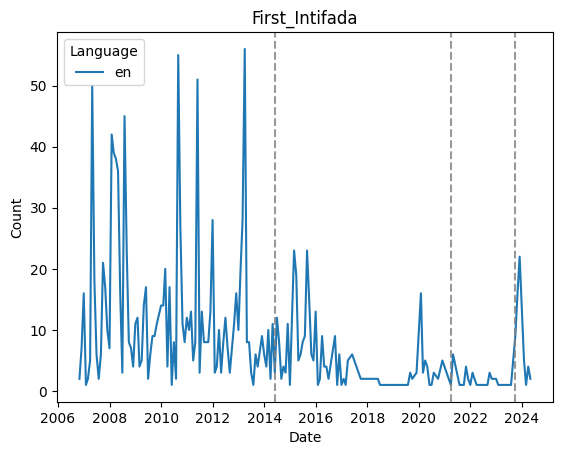

In [62]:
import matplotlib.pyplot as plt

def plot_article(article : str, df : pd.DataFrame = wikiData):

    df = df[df['Article'] == article]
    print(len(df))
    fig, ax = plt.subplots()

    for category, group in df.groupby('Language'):
        ax.plot(group['Date'], group['Count'], label=category)

    ax.axvline(datetime(2014,6,1), color='gray', linestyle='--', alpha=0.8)
    ax.axvline(datetime(2021,4,1), color='gray', linestyle='--', alpha=0.8)
    ax.axvline(datetime(2023,10,1), color='gray', linestyle='--', alpha=0.8)

    # Customize the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.set_title(article)
    ax.legend(title='Language')

    # Show plot
    plt.show()

plot_article("First_Intifada", wikiData)


In [23]:
print(len(wikiData))

3815
